In [1]:
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
from matplotlib import pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
# plt.xkcd()

In [4]:
plt.style.use('fivethirtyeight')

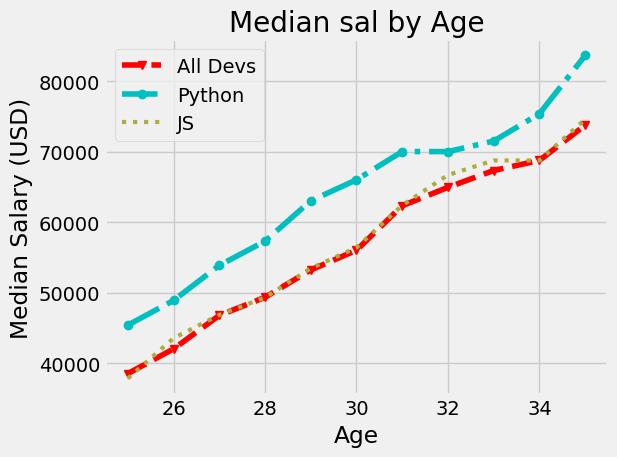

In [5]:
# list of values on the x-axis
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]    # age

dev_y = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]   # median salary
plt.plot(ages_x, dev_y, 'v--r', label='All Devs')

# Median Python Developer Salaries by Age
py_dev_y = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]
plt.plot(ages_x, py_dev_y, color='c', linestyle='-.', marker='o', label='Python')

# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583]
plt.plot(ages_x, js_dev_y, color='#adad3b', linestyle=':', label='JS', linewidth=3)
plt.title('Median sal by Age')

# ways to add legend: order in which plot is used. This is not recommended
# plt.legend(['All Devs', 'Python Devs'])
plt.legend(loc='upper left')


plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')

plt.grid(True)
plt.tight_layout()

# plt.savefig('./graph.png')
plt.show()

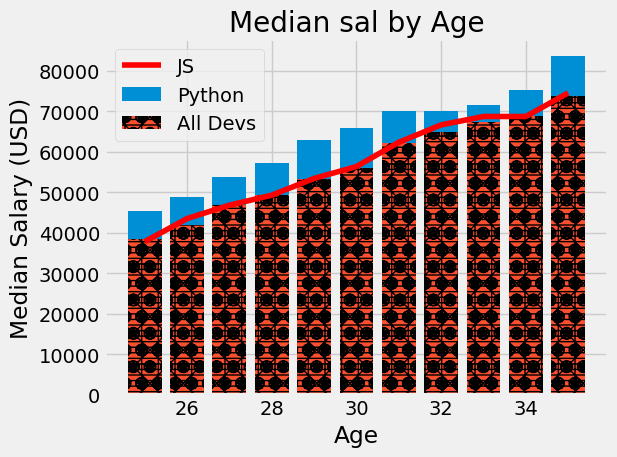

In [6]:
# list of values on the x-axis
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]    # age

# Median Python Developer Salaries by Age
py_dev_y = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]
plt.bar(ages_x, py_dev_y, label='Python')

# median salary of all devs
dev_y = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]   # median salary
bar = plt.bar(ages_x, dev_y, label='All Devs', hatch='\\/.--Oo*+')

# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583]
plt.plot(ages_x, js_dev_y, color='r', label='JS')

plt.title('Median sal by Age')

plt.legend()

plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')

plt.grid(True)
plt.tight_layout()

plt.show()

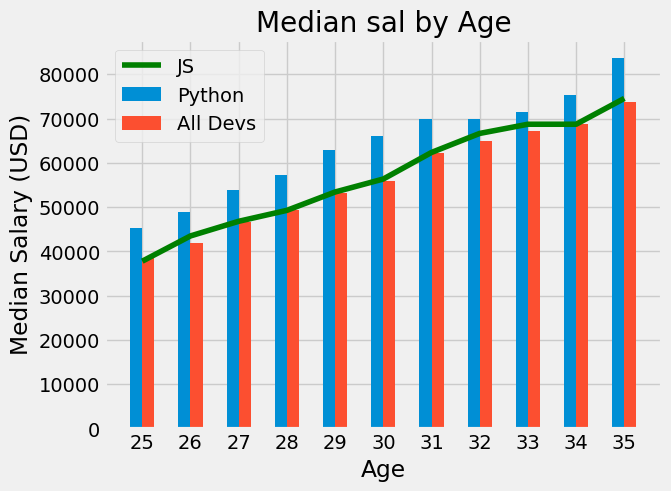

In [7]:
# putting bars side-by-side by offsetting the x-values using numpy
import numpy as np

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]    # age

x_indexes = np.arange(len(ages_x))
width = 0.25

# Median Python Developer Salaries by Age
py_dev_y = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]
plt.bar(x_indexes - width/2, py_dev_y, width=width, label='Python')

# median salary of all devs
dev_y = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]   # median salary
plt.bar(x_indexes + width/2, dev_y, width=width, label='All Devs')

# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583]
plt.plot(x_indexes, js_dev_y, color='g', label='JS')

plt.xticks(ticks=x_indexes, labels=ages_x)
plt.title('Median sal by Age')

plt.legend(loc='upper left')

plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')

plt.grid(True)

plt.show()

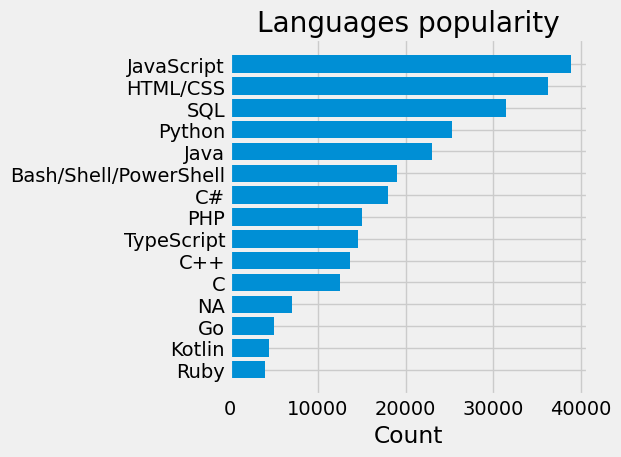

In [8]:
# import pandas as pd
import csv
from collections import Counter

# df = pd.read_csv('./sosurveydataset/survey_results_public.csv')
# df = df[['Respondent', 'LanguageWorkedWith']]

with open('./sosurveydataset/survey_results_public.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)

    language_counter = Counter()

    for row in csv_reader:
        language_counter.update(row['LanguageWorkedWith'].split(';'))

    # row = next(csv_reader)
    # print(row['LanguageWorkedWith'].split(';'))

#print(language_counter.most_common(15))
languages = []
counts = []
for item in language_counter.most_common(15):
    languages.append(item[0])
    counts.append(item[1])

languages.reverse()
counts.reverse()

width = 0.25
plt.barh(languages, counts)
plt.title('Languages popularity')
plt.xlabel('Count')

plt.tight_layout()
plt.show()


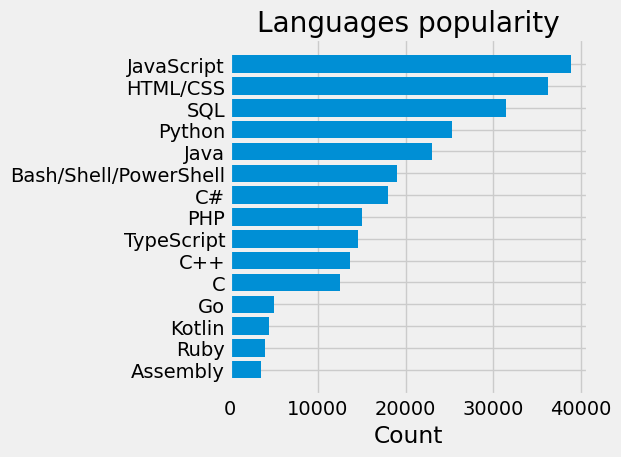

In [9]:
import pandas as pd
from collections import Counter

# df = df[['Respondent', 'LanguageWorkedWith']]

data = pd.read_csv('./sosurveydataset/survey_results_public.csv')
data = data.dropna(subset=['LanguageWorkedWith'])
data = data['LanguageWorkedWith']

language_counter = Counter()

for row in data:
    language_counter.update(row.split(';'))

languages = []
counts = []
for item in language_counter.most_common(15):
    languages.append(item[0])
    counts.append(item[1])

languages.reverse()
counts.reverse()

plt.barh(languages, counts)
plt.title('Languages popularity')
plt.xlabel('Count')

plt.tight_layout()
plt.show()

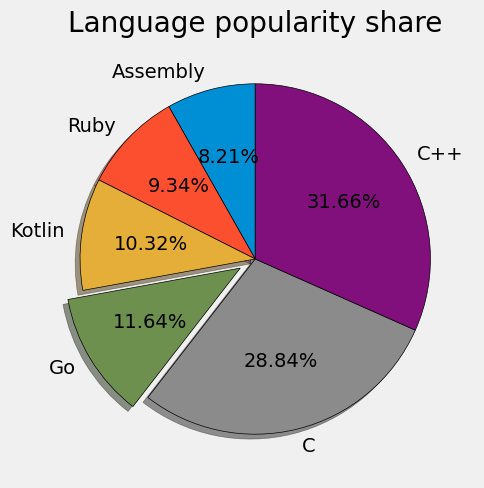

In [10]:
explode=[0,0,0,0.1,0,0]
plt.pie(counts[:6], labels=languages[:6], autopct='%1.2f%%', explode=explode, wedgeprops={'edgecolor':'black'}, shadow=True, startangle=90)    # colors=<color list>

plt.tight_layout()
plt.title('Language popularity share')
plt.show()

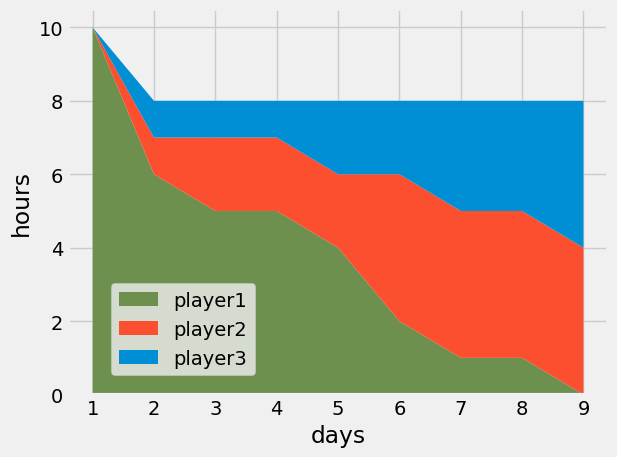

In [11]:
# stack/area plots

minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# player1 = [1, 2, 3, 3, 4, 4, 4, 4, 5]
# player2 = [1, 1, 1, 1, 2, 2, 2, 3, 4]
# player3 = [1, 1, 1, 2, 2, 2, 3, 3, 3]

player1 = [10, 6, 5, 5, 4, 2, 1, 1, 0]
player2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
player3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]
player = [player1, player2, player3]

labels = ['player1', 'player2', 'player3']
colors=['#6d904f', '#fc4f30', '#008fd5']

# plt.stackplot(minutes, player1, player2, player3, labels=labels, colors=colors)
plt.stackplot(minutes, player, colors=colors, labels=labels)
# plt.legend(loc='upper left')
plt.legend(loc=(0.08, 0.05))

plt.xlabel('days')
plt.ylabel('hours')
plt.tight_layout()
plt.show()

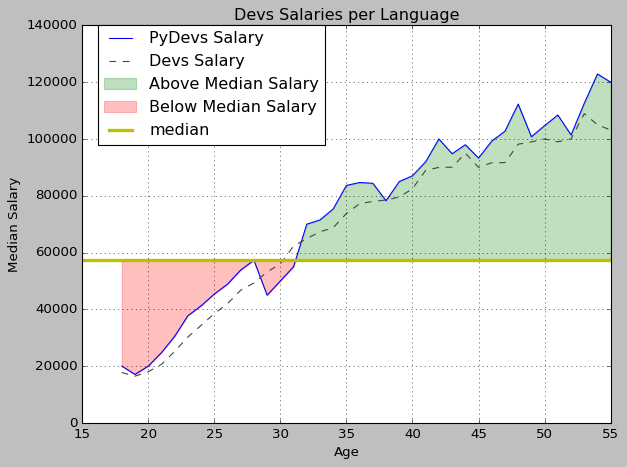

In [12]:
plt.style.use('classic')
data = pd.read_csv('./sosurveydataset/langperage.csv')
plt.plot(data['Age'], data['Python'], label='PyDevs Salary')
plt.plot(data['Age'], data['All_Devs'], color='#444444', linestyle='--', label='Devs Salary')

plt.xlabel('Age')
plt.ylabel('Median Salary')
plt.title('Devs Salaries per Language')
plt.grid(True)

overall_median = 57287
plt.fill_between(data['Age'], data['Python'], overall_median, where=(data['Python'] > overall_median), interpolate=True, color='g', alpha=0.25, label='Above Median Salary')
plt.fill_between(data['Age'], data['Python'], overall_median, where=(data['Python'] <= overall_median), interpolate=True, color='r', alpha=0.25, label='Below Median Salary')

plt.axhline(overall_median, color='y', label='median', linewidth=3)
plt.legend(loc=(0.03, 0.70))
plt.tight_layout()
plt.show()

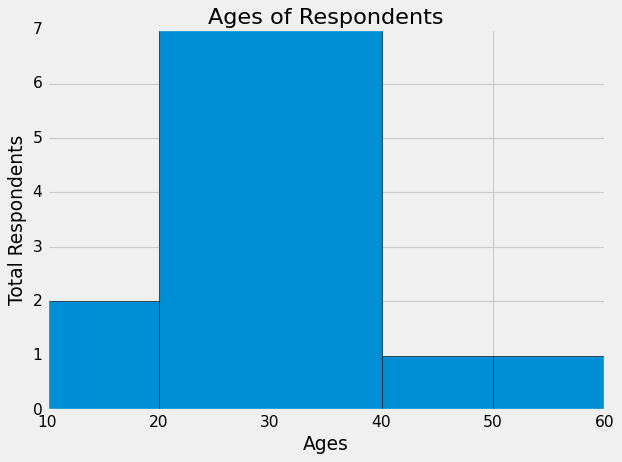

In [13]:
# Histogram
plt.style.use('fivethirtyeight')

ages = [18, 19, 21, 25, 26, 26, 30, 32, 38, 45, 55]

bins = [10, 20, 40, 50, 60]
# plt.hist(ages, bins=5, edgecolor='k')
plt.hist(ages, bins=bins, edgecolor='k')

plt.title('Ages of Respondents')
plt.xlabel('Ages')
plt.ylabel('Total Respondents')

plt.tight_layout()
plt.show()

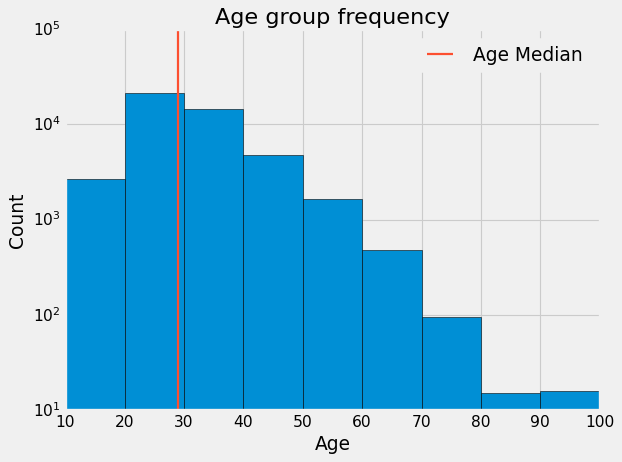

In [14]:
data = pd.read_csv('./sosurveydataset/survey_results_public.csv')
ids = data['Respondent']
ages = data['Age']

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.hist(ages, bins=bins, edgecolor='k', log=True)

median_age = 29

plt.axvline(median_age, color='#fc4f30', label='Age Median', linewidth=2)

plt.title('Age group frequency')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Scatter Plots
plt.style.use('seaborn')

x = [5, 7, 8, 5, 6, 7, 9, 2, 3, 4, 4, 4, 2, 6, 3, 6, 8, 6, 4, 1]
y = [7, 4, 3, 9, 1, 3, 2, 5, 2, 4, 8, 7, 1, 6, 4, 9, 7, 7, 5, 1]

# plt.scatter(x, y)
# plt.scatter(x, y, s=100, c='g', marker='o', edgecolor='k', linewidth=1, alpha=0.75)

colors = [7, 5, 9, 7, 5, 7, 2, 5, 3, 7, 1, 2, 8, 1, 9, 2, 5, 6, 7, 5]
sizes = [209, 486, 381, 255, 191, 315, 185, 228, 174, 538, 239, 394, 399, 153, 273, 293, 436, 501, 397, 539]
plt.scatter(x, y, s=sizes, cmap='Greens', c=colors, marker='o', edgecolor='k', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Satisfaction')


plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
plt.style.use('seaborn')

data = pd.read_csv('sosurveydataset/YTdata.csv')
view_count = data['view_count']
likes = data['likes']
ratio = data['ratio']

plt.scatter(view_count, likes, c=ratio, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Like/Dislike Ratio')

plt.xscale('log')
plt.yscale('log')

plt.title('Trending YouTube Videos')
plt.xlabel('View Count')
plt.ylabel('Total Likes')

plt.tight_layout()

plt.show()

In [ ]:
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

dates = [
    datetime(2019, 5, 24),
    datetime(2019, 5, 25),
    datetime(2019, 5, 26),
    datetime(2019, 5, 27),
    datetime(2019, 5, 28),
    datetime(2019, 5, 29),
    datetime(2019, 5, 30)
]

y = [0, 1, 3, 4, 6, 5, 7]

plt.plot_date(dates, y, linestyle='solid')

#get current figure
plt.gcf().autofmt_xdate()

date_format = mpl_dates.DateFormatter('%b, %d %Y')
#get current axis
plt.gca().xaxis.set_major_formatter(date_format)

plt.tight_layout()

plt.show( )

In [ ]:
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

data = pd.read_csv('./sosurveydataset/data.csv')

data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

price_date = data['Date']
price_close = data['Close']

plt.plot_date(price_date, price_close, linestyle='solid')
plt.gcf().autofmt_xdate()

plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')

plt.tight_layout()

plt.show( )

In [ ]:
%matplotlib notebook

In [ ]:
import random
from itertools import count
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

index = count()

def animate(i):
    x_vals.append(next(index))
    y_vals.append(random.randint(0, 5))

    plt.cla()
    plt.plot(x_vals, y_vals)

    plt.tight_layout()



ani = FuncAnimation(plt.gcf(), animate, interval=750)

plt.tight_layout()
plt.show()

import csv
import random
import time

x_value = 0
total_1 = 1000
total_2 = 1000

fieldnames = ["x_value", "total_1", "total_2"]


with open('data.csv', 'w') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

i= 25
while i:

    with open('data.csv', 'a') as csv_file:
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        info = {
            "x_value": x_value,
            "total_1": total_1,
            "total_2": total_2
        }

        csv_writer.writerow(info)
        print(x_value, total_1, total_2)

        x_value += 1
        total_1 = total_1 + random.randint(-6, 8)
        total_2 = total_2 + random.randint(-5, 6)
    
    i= i-1

    time.sleep(1)

import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

index = count()


def animate(i):
    data = pd.read_csv('data.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']

    plt.cla()

    plt.plot(x, y1, label='Channel 1')
    plt.plot(x, y2, label='Channel 2')

    plt.legend(loc='upper left')
    plt.tight_layout()


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()

# Another way to do it without clearing the Axis
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

plt.plot([], [], label='Channel 1')
plt.plot([], [], label='Channel 2')


def animate(i):
    data = pd.read_csv('data.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']

    ax = plt.gca()
    line1, line2 = ax.lines

    line1.set_data(x, y1)
    line2.set_data(x, y2)

    xlim_low, xlim_high = ax.get_xlim()
    ylim_low, ylim_high = ax.get_ylim()

    ax.set_xlim(xlim_low, (x.max() + 5))

    y1max = y1.max()
    y2max = y2.max()
    current_ymax = y1max if (y1max > y2max) else y2max

    y1min = y1.min()
    y2min = y2.min()
    current_ymin = y1min if (y1min < y2min) else y2min

    ax.set_ylim((current_ymin - 5), (current_ymax + 5))


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# till now pyplot is having a state which keeps record of what figure and axes we are currently working with
# SUBPLOTES: Creating plotes in Onject Oriented Way. Preffered way to create plots, even if it one in number
# as of OOPs approach, we need something like plt=Plot()
# figure: Container holding plots. The whole window when we run our code. They can have multiple plots
# axes: actual plots
%matplotlib inline

# plt.gcf() # to get current figure for the plot
# plt.gca() # to get current axes for the plot

plt.style.use('seaborn')

data = pd.read_csv('./sosurveydataset/langperage.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

# subplots creates figures and specifies certain number of rows and cols of the axes
fig, ax = plt.subplots()    # currently, by default 1 row and 1 col, ax is set to single axes/plot

# updating code to use the axes we created, instead of using pyplot object
ax.plot(ages, py_salaries, label='Python')
ax.plot(ages, js_salaries, label='JavaScript')

ax.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')

ax.legend()

ax.set_title('Median Salary (USD) by Age')
ax.set_xlabel('Ages')
ax.set_ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()

In [ ]:
# CREATING MORE THAN 1 AXES IN THE SAME FIGURE

data = pd.read_csv('./sosurveydataset/langperage.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)
# print(ax1)
# print(ax2)

ax2.plot(ages, py_salaries, label='Python')
ax2.plot(ages, js_salaries, label='JavaScript')

ax1.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')

ax1.legend(loc='upper left')
ax1.set_title('Median Salary (USD) by Age')
ax1.set_ylabel('Median Salary (USD)')

ax2.legend(loc='upper left')
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()

In [ ]:
# CREATING MORE THAN 1 AXES IN MORE THAN 1 FIGURE

data = pd.read_csv('./sosurveydataset/langperage.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()


ax2.plot(ages, py_salaries, label='Python')
ax2.plot(ages, js_salaries, label='JavaScript')

ax1.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')

ax1.legend(loc='upper left')
ax1.set_title('Median Salary (USD) by Age')
ax1.set_ylabel('Median Salary (USD)')

ax2.legend(loc='upper left')
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()

1. title has fontdict={'fontweight':'bold', 'fontsize':18}
2. savefig ahs dpi=300 which is 300 times plt.figure(figsize=(8,5))
3. In xticks, labels can be like df['series'].tolist()[::3] + 2011 ; an  extra number to extend view of the graph

In [ ]:
plt.style.use('default')

data = pd.read_csv('./sosurveydataset/langperage.csv')
plt.boxplot([data['All_Devs'], data['Python'], data['JavaScript']], labels=['All Devs', 'Python', 'Javascript'])
plt.xlabel('Devs Groups')
plt.ylabel('Median Salary')
plt.legend()
plt.grid(True)
plt.show()